In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Change this accordingly
save_directory = '/content/drive/My Drive/results/'

In [ ]:
import os

In [ ]:
from pathlib import Path

In [ ]:
import pandas as pd

In [ ]:
for prompt_type in os.listdir(save_directory):
  second_directory = os.path.join(save_directory, prompt_type)
  for model in os.listdir(second_directory):
    third_directory = os.path.join(second_directory, model)
    for csv in os.listdir(third_directory):
      files = Path(third_directory).glob('*.csv')
      frames = [pd.read_csv(file) for file in files]
    match prompt_type:
      case 'baseline_prompt':
        match model:
          case 'alpaca':
            baseline_alpaca = pd.concat(frames)
          case 'neural':
            baseline_neural = pd.concat(frames)
          case 'chatml':
            baseline_chatml = pd.concat(frames)
      case 'simple_prompt':
        match model:
          case 'alpaca':
            simple_alpaca = pd.concat(frames)
          case 'neural':
            simple_neural = pd.concat(frames)
          case 'chatml':
            simple_chatml = pd.concat(frames)
      case 'instruction_prompt':
        match model:
          case 'alpaca':
            instruction_alpaca = pd.concat(frames)
          case 'neural':
            instruction_neural = pd.concat(frames)
          case 'chatml':
            instruction_chatml = pd.concat(frames)
      case 'example_prompt':
        match model:
          case 'alpaca':
            example_alpaca = pd.concat(frames)
          case 'neural':
            example_neural = pd.concat(frames)
          case 'chatml':
            example_chatml = pd.concat(frames)

In [ ]:
baseline_alpaca['prompt'] = 'baseline'
baseline_alpaca['model'] = 'alpaca'

baseline_neural['prompt'] = 'baseline'
baseline_neural['model'] = 'neural'

baseline_chatml['prompt'] = 'baseline'
baseline_chatml['model'] = 'chatml'

simple_alpaca['prompt'] = 'simple'
simple_alpaca['model'] = 'alpaca'

simple_neural['prompt'] = 'simple'
simple_neural['model'] = 'neural'

simple_chatml['prompt'] = 'simple'
simple_chatml['model'] = 'chatml'

instruction_alpaca['prompt'] = 'instruction'
instruction_alpaca['model'] = 'alpaca'

instruction_neural['prompt'] = 'instruction'
instruction_neural['model'] = 'neural'

instruction_chatml['prompt'] = 'instruction'
instruction_chatml['model'] = 'chatml'

example_alpaca['prompt'] = 'example'
example_alpaca['model'] = 'alpaca'

example_neural['prompt'] = 'example'
example_neural['model'] = 'neural'

example_chatml['prompt'] = 'example'
example_chatml['model'] = 'chatml'

In [ ]:
frames = [baseline_alpaca, baseline_neural, baseline_chatml, simple_alpaca, simple_neural, simple_chatml, instruction_alpaca, instruction_neural, instruction_chatml, example_alpaca, example_neural, example_chatml]

In [ ]:
df_total = pd.concat(frames)

In [ ]:
! pip install --upgrade pyarrow datasets

In [ ]:
from datasets import Dataset

In [ ]:
ds = Dataset.from_pandas(df_total)

In [ ]:
! pip install huggingface_hub

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
ds.push_to_hub("RCODI/empathy-prompt")

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/14 [00:00<?, ?ba/s]

CommitInfo(commit_url='https://huggingface.co/datasets/RCODI/empathy-prompt/commit/b1f0f5d4682b256d098a8723e07ab335e1183b88', commit_message='Upload dataset', commit_description='', oid='b1f0f5d4682b256d098a8723e07ab335e1183b88', pr_url=None, pr_revision=None, pr_num=None)

In [ ]:
df_total.columns

Index(['Unnamed: 0', 'Context', 'Baseline Response', 'bot', 'response',
       'text similarity', 'BLEU score', 'ROUGE score', 'LEVEN distance',
       'semantic similarity', 'factual consistency', 'LLM response length',
       'LLM person form', 'LLM pronoun', 'LLM tense', 'LLM exclamation',
       'LLM stimulating dialogue', 'LLM acknowledging',
       'LLM collective reasoning', 'LLM imperative statement',
       'LLM interim questions', 'LLM caring statement',
       'baseline response length', 'baseline person form', 'baseline pronoun',
       'baseline tense', 'baseline exclamation',
       'baseline stimulating dialogue', 'baseline acknowledging',
       'baseline collective reasoning', 'baseline imperative statement',
       'baseline interim questions', 'baseline caring statement', 'prompt',
       'model'],
      dtype='object')

In [ ]:
print(baseline_alpaca.sample()[['bot','Baseline Response','response']].values)

[['Non-Empathy Bot'
  'Did the landlord include actual receipts?\n\nYes\nNo, it was just an estimate\nNo, there were no estimates or receipts'
  'Great. Is the amount the landlord deducted reasonable?\n\n']]


In [ ]:
print(baseline_neural.sample()[['bot','Baseline Response','response']].values)

[['Non-Empathy Bot'
  'The law can provide for two times the security deposit for some violations, but this letter only asks for the original deposit amount back. Edit this letter as desired.\n\nContinue'
  "Rentervention will create a custom letter for the tenant requesting the full security deposit back. Please provide the landlord's name, address, and contact details to complete the letter."]]


In [ ]:
print(baseline_chatml.sample()[['bot','Baseline Response','response']].values)

[['Empathy Bot'
  'Thank you for telling me. Do you owe money to your landlord for any past-due rent? Under the law, your landlord may be able to deduct past-due rent from your deposit.\n\nYes, I owe my landlord money for past-due rent.\nNo, I do not owe any money for past-due rent.'
  "That's good. We'll need to examine your lease agreement to ensure all terms are met. Could you share if there are any unpaid rent or fees mentioned in your lease?"]]


In [ ]:
print(simple_alpaca.sample()[['bot','Baseline Response','response']].values)

[['Empathy Bot'
  'Did your landlord include actual receipts?\n\nYes, there were receipts included.\nNo, it was just an estimate\nNo, there were no estimates or receipts'
  'Thank you for sharing that information with us. We can use this information when we write our letter. Do you agree with the deductions that your landlord mentioned?\n\n']]


In [ ]:
print(simple_neural.sample()[['bot','Baseline Response','response']].values)

[['Non-Empathy Bot' "The tenant is in Chicago.\n\nLet's continue."
  "In Chicago's 60606 zip code, landlords and tenants must follow the Illinois Residential Landlord and Tenant Act (ILRLTA). The ILRLTA states that a landlord must return the security deposit to the tenant within 45 days of the tenant moving out, unless there are valid reasons for withholding some or all of the deposit. To determine if there is a valid reason, it's important to review the terms of your lease agreement. For instance, your landlord might withhold the deposit if there is damage to the property beyond normal wear and tear. If you believe your security deposit has been handled improperly, you may consider discussing the matter with your landlord and consulting a legal professional if needed."]]


In [ ]:
print(simple_chatml.sample()[['bot','Baseline Response','response']].values)

[['Non-Empathy Bot'
  'Select the type of rental.\n\nSingle family home\nSmall family (6 units or fewer)\nLarge building (7 or more units)'
  "In Chicago, the security deposit rules are regulated by the Chicago Residential Landlord and Tenant Ordinance (CRLTO) for homes, apartments, and condos. According to the CRLTO, the maximum amount of security deposit that a landlord can charge is the equivalent of two months' rent if the tenant is moving in with the property being already vacant. If the landlord is currently living in the property or has a family member living in the property, the maximum security deposit increases to the equivalent of three months' rent. Additionally, the landlord is required to provide the tenant with a written notice stating the amount of the security deposit and other details within 14 days of receiving the deposit. For rental units with a lease term of less than six months, the security deposit can be no more than one month's rent.\n\nIf you have concerns or

In [ ]:
print(instruction_alpaca.sample()[['bot','Baseline Response','response']].values)

[['Empathy Bot'
  'Great, thank you for the response. Did you sign a written lease?\n\nYes, I signed a written lease.\nNo, I did not sign a written lease.'
  "2000. Thank you. We'll also need to know why you believe the landlord should return your full security deposit. Could you please share the details of your situation?\n\n"]]


In [ ]:
print(instruction_neural.sample()[['bot','Baseline Response','response']].values)

[['Empathy Bot'
  "If that's true, your landlord may not be able to deduct any money for repairs and you may be able to get your deposit back."
  "Even if you've been given an estimate, the law still requires your landlord to provide specific documentation within 30 days of receiving your written request for the return of your deposit. We should move forward with writing a letter. Would you like us to draft the letter for you, and then you can send it to your landlord?\n  "]]


In [ ]:
print(instruction_chatml.sample()[['bot','Baseline Response','response']].values)

[['Non-Empathy Bot'
  'Security deposit law varies based on where the property is located. Provide a zip code.'
  "Please provide more details about the situation regarding your security deposit. Are you trying to get your security deposit back, or is there a dispute with your landlord about the amount they're claiming is owed?"]]


In [ ]:
print(example_alpaca.sample()[['bot','Baseline Response','response']].values)

[['Empathy Bot' 'Thanks for using Rentervention!'
  "You're welcome! Is there anything else that we can assist you with today?"]]


In [ ]:
print(example_neural.sample()[['bot','Baseline Response','response']].values)

[['Empathy Bot'
  "While the letter asks for the entire security deposit, you may negotiate something different with your landlord, either for more or less. With that in mind, let's proceed.\n\nOkay, let's continue"
  "Alright, we'll work on drafting a letter to demand your security deposit back. Could you please share your landlord's contact information, like their name, email, and phone number?\n  "]]


In [ ]:
print(example_chatml.sample()[['bot','Baseline Response','response']].values)

[['Non-Empathy Bot'
  'Select the type of rental.\n\nSingle family home\nSmall family (6 units or fewer)\nLarge building (7 or more units)'
  "In Chicago, the general rule for security deposits in residential leases is that the amount cannot exceed an equivalent of 2 months' rent. Additionally, landlords must provide written notice of the specific money amount withheld from the deposit within 30 days after the tenant vacates the unit. For rental units covered under the Chicago Residential Landlord and Tenant Ordinance (CRLTO), landlords must place security deposits in an interest-bearing account and provide an annual statement of interest earned, or they can pay the tenant the interest each year.\n\nIf there's a dispute over the security deposit, you can try to resolve it through communication with the landlord first. If that fails, you may consider mediation or seeking assistance from the Chicago Department of Business Affairs and Consumer Protection (BACP), which handles landlord-ten

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
from scipy import stats

In [ ]:
stats.kruskal(baseline_alpaca['text similarity'], baseline_neural['text similarity'], baseline_chatml['text similarity'],
              simple_alpaca['text similarity'], simple_neural['text similarity'], simple_chatml['text similarity'],
              instruction_alpaca['text similarity'], instruction_neural['text similarity'], instruction_chatml['text similarity'],
              example_alpaca['text similarity'], example_neural['text similarity'], example_chatml['text similarity'])

KruskalResult(statistic=196.76466062471607, pvalue=3.487252450119032e-36)

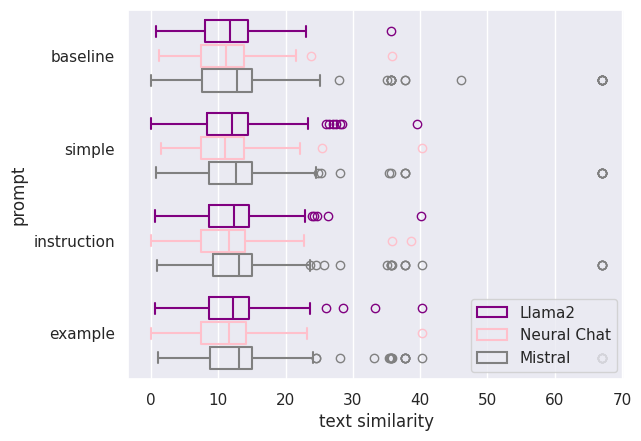

In [ ]:
ax = sns.boxplot(data=df_total, x='text similarity', y='prompt', hue='model', fill=False, gap=.1,
                 palette=['purple', 'pink', 'gray'])
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=['Llama2','Neural Chat', 'Mistral'])
plt.show()

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
df_total.rename(columns = {'text similarity':'text_similarity'}, inplace=True)

In [ ]:
model = ols('text_similarity ~ C(prompt) * C(model)', data = df_total).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                           sum_sq       df           F        PR(>F)
C(prompt)              222.798101      3.0    2.613387  4.947830e-02
C(model)              6199.319696      2.0  109.075568  1.038990e-47
C(prompt):C(model)     114.480669      6.0    0.671420  6.728172e-01
Residual            374770.582581  13188.0         NaN           NaN


In [ ]:
stats.kruskal(baseline_alpaca['BLEU score'], baseline_neural['BLEU score'], baseline_chatml['BLEU score'],
              simple_alpaca['BLEU score'], simple_neural['BLEU score'], simple_chatml['BLEU score'],
              instruction_alpaca['BLEU score'], instruction_neural['BLEU score'], instruction_chatml['BLEU score'],
              example_alpaca['BLEU score'], example_neural['BLEU score'], example_chatml['BLEU score'])

KruskalResult(statistic=193.07141893984388, pvalue=2.031511664994855e-35)

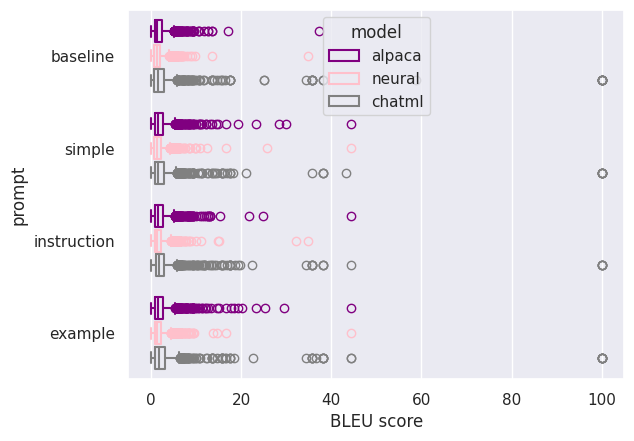

In [ ]:
sns.boxplot(data=df_total, x='BLEU score', y='prompt', hue='model', fill=False, gap=.1,
            palette=['purple', 'pink', 'gray'])
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=['Llama2','Neural Chat', 'Mistral'])
plt.show()

In [ ]:
df_total.rename(columns = {'BLEU score':'BLEU_score'}, inplace=True)
model = ols('BLEU_score ~ C(prompt) * C(model)', data = df_total).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                           sum_sq       df          F        PR(>F)
C(prompt)               80.148482      3.0   0.909399  4.354868e-01
C(model)              5221.829087      2.0  88.873680  4.575560e-39
C(prompt):C(model)      87.221936      6.0   0.494829  8.127164e-01
Residual            387434.626250  13188.0        NaN           NaN


In [ ]:
stats.kruskal(baseline_alpaca['ROUGE score'], baseline_neural['ROUGE score'], baseline_chatml['ROUGE score'],
              simple_alpaca['ROUGE score'], simple_neural['ROUGE score'], simple_chatml['ROUGE score'],
              instruction_alpaca['ROUGE score'], instruction_neural['ROUGE score'], instruction_chatml['ROUGE score'],
              example_alpaca['ROUGE score'], example_neural['ROUGE score'], example_chatml['ROUGE score'])

KruskalResult(statistic=129.9160154469961, pvalue=1.8102917560801363e-22)

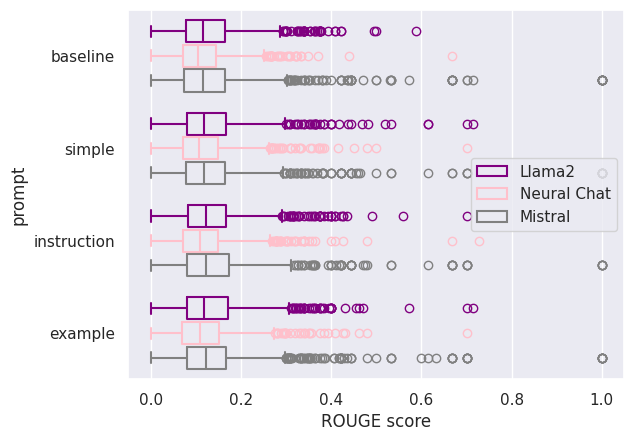

In [ ]:
ax = sns.boxplot(data=df_total, x='ROUGE score', y='prompt', hue='model', fill=False,
            gap=.1,palette=['purple', 'pink', 'gray'])
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=['Llama2','Neural Chat', 'Mistral'])
plt.show()

In [ ]:
df_total.rename(columns = {'ROUGE score':'ROUGE_score'}, inplace=True)
model = ols('ROUGE_score ~ C(prompt) * C(model)', data = df_total).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                        sum_sq       df          F        PR(>F)
C(prompt)             0.025611      3.0   1.007932  3.880062e-01
C(model)              1.593389      2.0  94.062935  2.739132e-41
C(prompt):C(model)    0.038370      6.0   0.755039  6.053215e-01
Residual            111.699745  13188.0        NaN           NaN


In [ ]:
stats.kruskal(baseline_alpaca['LEVEN distance'], baseline_neural['LEVEN distance'], baseline_chatml['LEVEN distance'],
              simple_alpaca['LEVEN distance'], simple_neural['LEVEN distance'], simple_chatml['LEVEN distance'],
              instruction_alpaca['LEVEN distance'], instruction_neural['LEVEN distance'], instruction_chatml['LEVEN distance'],
              example_alpaca['LEVEN distance'], example_neural['LEVEN distance'], example_chatml['LEVEN distance'])

KruskalResult(statistic=176.26074044091948, pvalue=6.055694364621433e-32)

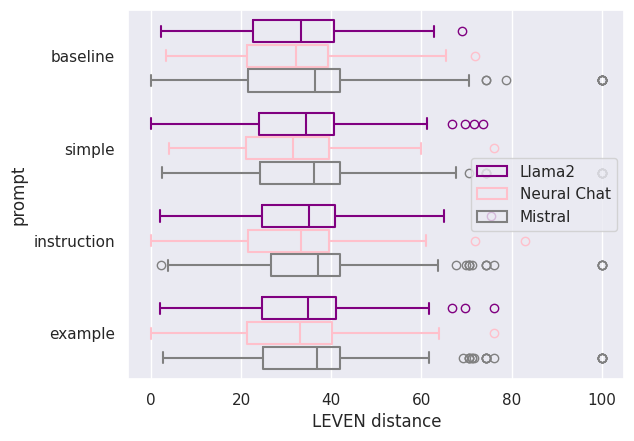

In [ ]:
ax = sns.boxplot(data=df_total, x='LEVEN distance', y='prompt', hue='model', fill=False, gap=.1,
            palette=['purple', 'pink', 'gray'])
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=['Llama2','Neural Chat', 'Mistral'])
plt.show()

In [ ]:
df_total.rename(columns = {'LEVEN distance':'LEVEN_distance'}, inplace=True)
model = ols('LEVEN_distance ~ C(prompt) * C(model)', data = df_total).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                          sum_sq       df          F        PR(>F)
C(prompt)           1.493356e+03      3.0   3.159852  2.358257e-02
C(model)            2.714891e+04      2.0  86.168232  6.607160e-38
C(prompt):C(model)  1.007727e+03      6.0   1.066146  3.802908e-01
Residual            2.077563e+06  13188.0        NaN           NaN


In [ ]:
stats.kruskal(baseline_alpaca['semantic similarity'], baseline_neural['semantic similarity'], baseline_chatml['semantic similarity'],
              simple_alpaca['semantic similarity'], simple_neural['semantic similarity'], simple_chatml['semantic similarity'],
              instruction_alpaca['semantic similarity'], instruction_neural['semantic similarity'], instruction_chatml['semantic similarity'],
              example_alpaca['semantic similarity'], example_neural['semantic similarity'], example_chatml['semantic similarity'])

KruskalResult(statistic=13.830677128240506, pvalue=0.24250483768444345)

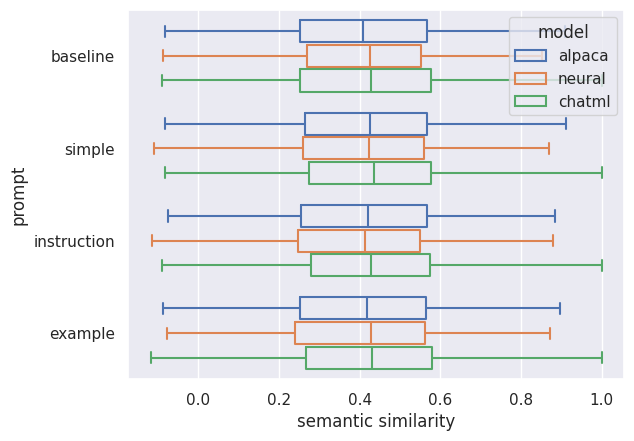

In [ ]:
sns.boxplot(data=df_total, x='semantic similarity', y='prompt', hue='model', fill=False, gap=.1)
plt.show()

In [ ]:
df_total['semantic similarity'].mean()

0.411908348387206

In [ ]:
df_total['semantic similarity'].std()

0.2049720521139156

In [ ]:
stats.kruskal(baseline_alpaca['factual consistency'], baseline_neural['factual consistency'], baseline_chatml['factual consistency'],
              simple_alpaca['factual consistency'], simple_neural['factual consistency'], simple_chatml['factual consistency'],
              instruction_alpaca['factual consistency'], instruction_neural['factual consistency'], instruction_chatml['factual consistency'],
              example_alpaca['factual consistency'], example_neural['factual consistency'], example_chatml['factual consistency'])

KruskalResult(statistic=8.45611649459016, pvalue=0.6719562516348374)

In [ ]:
df_total_empathy = df_total[df_total['bot']=='Empathy Bot']
df_total_nonemapthy = df_total[df_total['bot'] == 'Non-Empathy Bot']

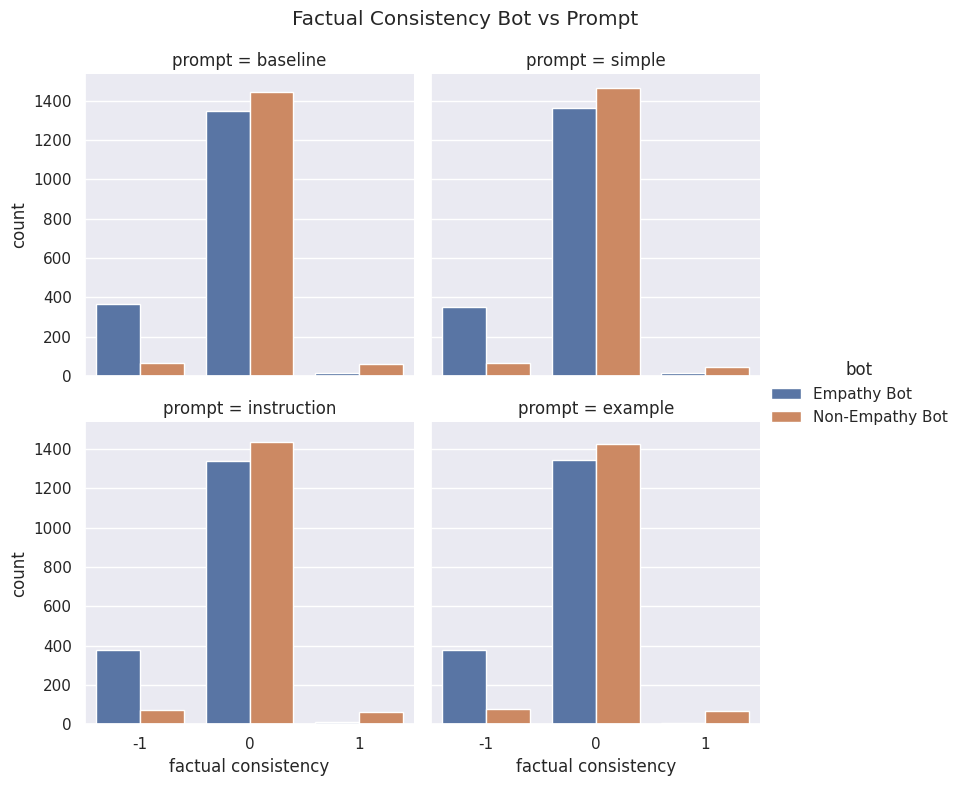

In [ ]:
g = sns.catplot( data=df_total, x='factual consistency', hue='bot', col='prompt', kind='count', col_wrap=2, height=4, aspect=1)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Factual Consistency Bot vs Prompt')
plt.show()

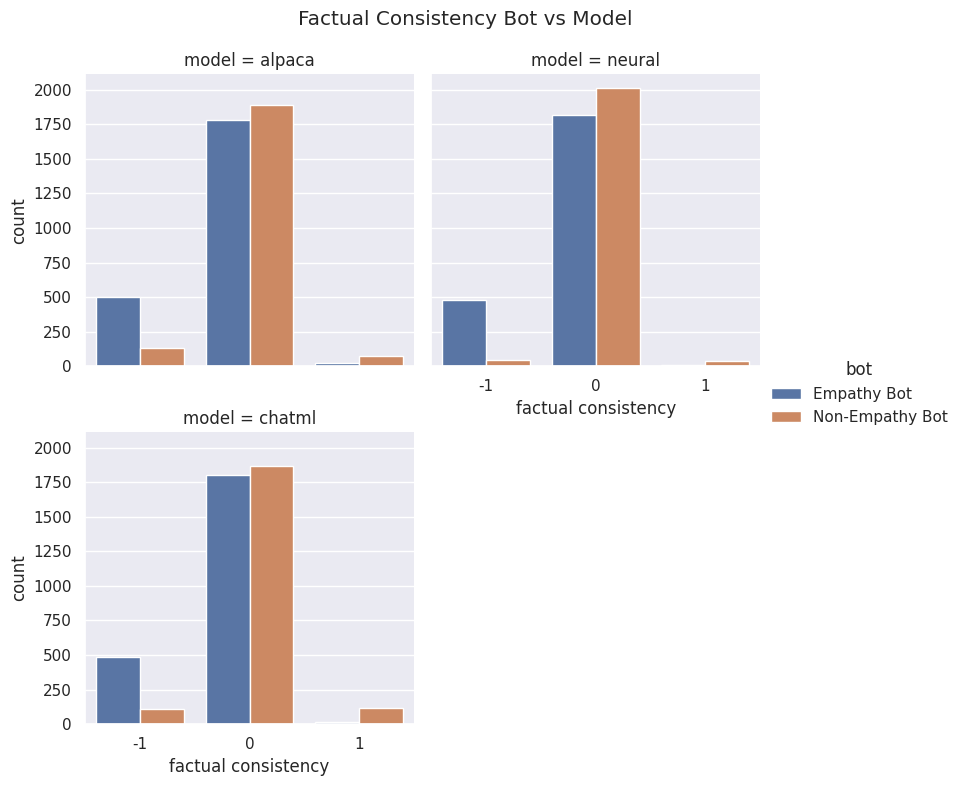

In [ ]:
g = sns.catplot(data=df_total, x='factual consistency', hue='bot', col='model', kind='count', col_wrap=2, height=4, aspect=1)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Factual Consistency Bot vs Model')
plt.show()

In [ ]:
from statsmodels.graphics.factorplots import interaction_plot

In [ ]:
prompt_order = ['baseline', 'simple', 'instruction', 'example']

In [ ]:
prompt_map = {'baseline':0,
              'simple':1,
              'instruction':2,
              'example':3}

In [ ]:
df_person_form = pd.DataFrame()

In [ ]:
df_person_form['difference'] = df_total['LLM person form'] - df_total['baseline person form']
df_person_form['prompt'] = df_total['prompt']
df_person_form['prompt'] = pd.Categorical(df_person_form['prompt'], categories=prompt_order, ordered=True)
df_person_form['bot'] = df_total['bot']
df_person_form['model'] = df_total['model']
df_person_form_empathy = df_person_form[df_person_form['bot'] == 'Empathy Bot']

In [ ]:
fig = interaction_plot(x=df_person_form_empathy['prompt'], trace=df_person_form_empathy['model'], response=df_person_form_empathy['difference'],
                       colors=['purple', 'gray', 'pink'], markers=['D', '^', 'o'], ms=10)
plt.xlabel('Prompt Strategy')
plt.ylabel('Difference')
plt.title('Person Form (Empathy Bot) Interaction Plot')
plt.legend(title='Model Selection')
plt.show()

NameError: name 'interaction_plot' is not defined

In [ ]:
model = ols('difference ~  C(model) * C(prompt) ', data=df_person_form_empathy).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

NameError: name 'ols' is not defined

In [ ]:
df_pronoun = pd.DataFrame()

In [ ]:
df_pronoun['difference'] = df_total['LLM pronoun'] - df_total['baseline pronoun']
df_pronoun['prompt'] = df_total['prompt']
df_pronoun['prompt'] = pd.Categorical(df_pronoun['prompt'], categories=prompt_order, ordered=True)
df_pronoun['bot'] = df_total['bot']
df_pronoun['model'] = df_total['model']
df_pronoun_empathy = df_pronoun[df_pronoun['bot'] == 'Empathy Bot']

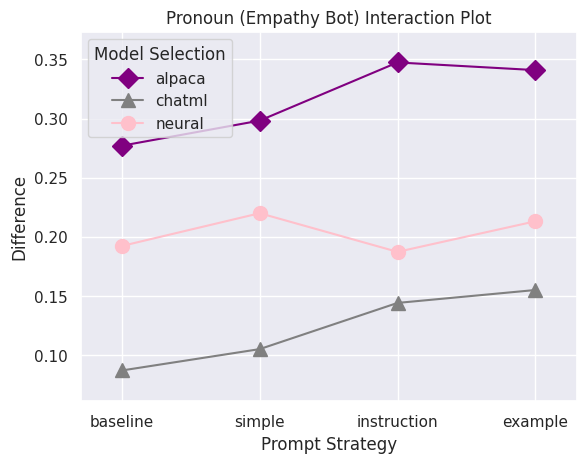

In [ ]:
fig = interaction_plot(x=df_pronoun_empathy['prompt'], trace=df_pronoun_empathy['model'], response=df_pronoun_empathy['difference'],
                       colors=['purple', 'gray', 'pink'], markers=['D', '^', 'o'], ms=10)
plt.xlabel('Prompt Strategy')
plt.ylabel('Difference')
plt.title('Pronoun (Empathy Bot) Interaction Plot')
plt.legend(title='Model Selection')
plt.show()

In [ ]:
model = ols('difference ~  C(model) * C(prompt) ', data=df_pronoun_empathy).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                         sum_sq      df          F        PR(>F)
C(model)              43.383593     2.0  67.709446  7.568311e-30
C(prompt)              2.601131     3.0   2.706417  4.369255e-02
C(model):C(prompt)     1.594233     6.0   0.829381  5.469033e-01
Residual            2210.524613  6900.0        NaN           NaN


In [ ]:
df_tense = pd.DataFrame()

In [ ]:
df_tense['difference'] = df_total['LLM tense'] - df_total['baseline tense']
df_tense['prompt'] = df_total['prompt']
df_tense['prompt'] = pd.Categorical(df_tense['prompt'], categories=prompt_order, ordered=True)
df_tense['bot'] = df_total['bot']
df_tense['model'] = df_total['model']
df_tense_empathy = df_tense[df_tense['bot'] == 'Empathy Bot']

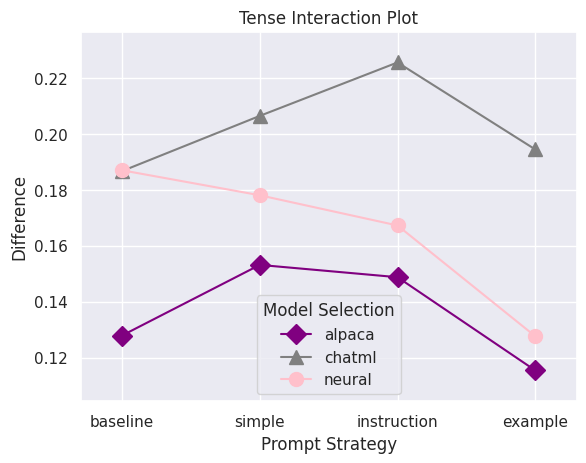

In [ ]:
fig = interaction_plot(x=df_tense_empathy['prompt'], trace=df_tense_empathy['model'], response=df_tense_empathy['difference'],
                       colors=['purple', 'gray', 'pink'], markers=['D', '^', 'o'], ms=10)
plt.xlabel('Prompt Strategy')
plt.ylabel('Difference')
plt.title('Tense Interaction Plot')
plt.legend(title='Model Selection')
plt.show()

In [ ]:
model = ols('difference ~  C(model) * C(prompt) ', data=df_tense_empathy).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                         sum_sq      df         F    PR(>F)
C(model)               5.203205     2.0  9.772506  0.000058
C(prompt)              1.338905     3.0  1.676462  0.169764
C(model):C(prompt)     0.885713     6.0  0.554507  0.766799
Residual            1836.893981  6900.0       NaN       NaN


In [ ]:
df_exclamation = pd.DataFrame()

In [ ]:
df_exclamation['difference'] = df_total['LLM exclamation'] - df_total['baseline exclamation']
df_exclamation['prompt'] = df_total['prompt']
df_exclamation['prompt'] = pd.Categorical(df_exclamation['prompt'], categories=prompt_order, ordered=True)
df_exclamation['bot'] = df_total['bot']
df_exclamation['model'] = df_total['model']
df_exclamation_empathy = df_exclamation[df_exclamation['bot'] == 'Empathy Bot']

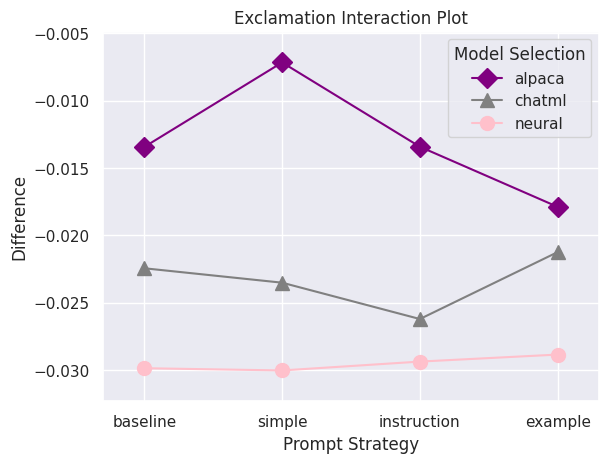

In [ ]:
fig = interaction_plot(x=df_exclamation_empathy['prompt'], trace=df_exclamation_empathy['model'], response=df_exclamation_empathy['difference'],
                       colors=['purple', 'gray', 'pink'], markers=['D', '^', 'o'], ms=10)
plt.xlabel('Prompt Strategy')
plt.ylabel('Difference')
plt.title('Exclamation Interaction Plot')
plt.legend(title='Model Selection')
plt.show()

In [ ]:
model = ols('difference ~  C(model) * C(prompt) ', data=df_exclamation_empathy).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                       sum_sq      df          F        PR(>F)
C(model)             0.322036     2.0  19.514851  3.537430e-09
C(prompt)            0.007854     3.0   0.317308  8.128818e-01
C(model):C(prompt)   0.033924     6.0   0.685246  6.615981e-01
Residual            56.932270  6900.0        NaN           NaN


In [ ]:
df_stimulating_dialogue = pd.DataFrame()

In [ ]:
df_stimulating_dialogue['difference'] = df_total['LLM stimulating dialogue'] - df_total['baseline stimulating dialogue']
df_stimulating_dialogue['prompt'] = df_total['prompt']
df_stimulating_dialogue['prompt'] = pd.Categorical(df_stimulating_dialogue['prompt'], categories=prompt_order, ordered=True)
df_stimulating_dialogue['bot'] = df_total['bot']
df_stimulating_dialogue['model'] = df_total['model']
df_stimulating_dialogue_empathy = df_stimulating_dialogue[df_stimulating_dialogue['bot'] == 'Empathy Bot']

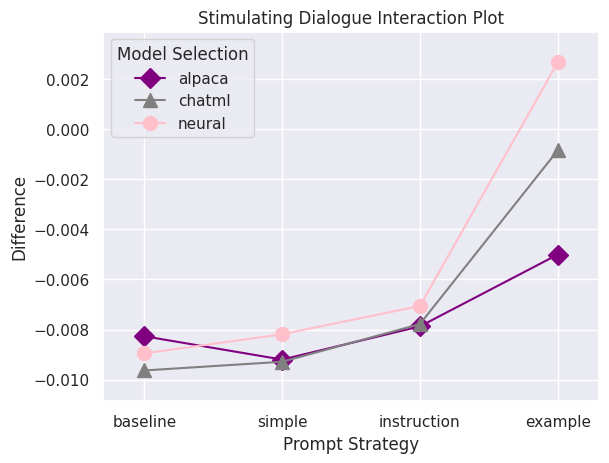

In [ ]:
fig = interaction_plot(x=df_stimulating_dialogue_empathy['prompt'], trace=df_stimulating_dialogue_empathy['model'],
                       response=df_stimulating_dialogue_empathy['difference'],
                       colors=['purple', 'gray', 'pink'], markers=['D', '^', 'o'], ms=10)
plt.xlabel('Prompt Strategy')
plt.ylabel('Difference')
plt.title('Stimulating Dialogue Interaction Plot')
plt.legend(title='Model Selection')
plt.show()

In [ ]:
model = ols('difference ~  C(model) * C(prompt) ', data=df_stimulating_dialogue_empathy).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                       sum_sq      df         F    PR(>F)
C(model)             0.005849     2.0  0.963932  0.381442
C(prompt)            0.073279     3.0  8.050380  0.000024
C(model):C(prompt)   0.012358     6.0  0.678830  0.666804
Residual            20.935858  6900.0       NaN       NaN


In [ ]:
df_acknowledging = pd.DataFrame()

In [ ]:
df_acknowledging['difference'] = df_total['LLM acknowledging'] - df_total['baseline acknowledging']
df_acknowledging['prompt'] = df_total['prompt']
df_acknowledging['prompt'] = pd.Categorical(df_acknowledging['prompt'], categories=prompt_order, ordered=True)
df_acknowledging['bot'] = df_total['bot']
df_acknowledging['model'] = df_total['model']
df_acknowledging_empathy = df_acknowledging[df_acknowledging['bot'] == 'Empathy Bot']

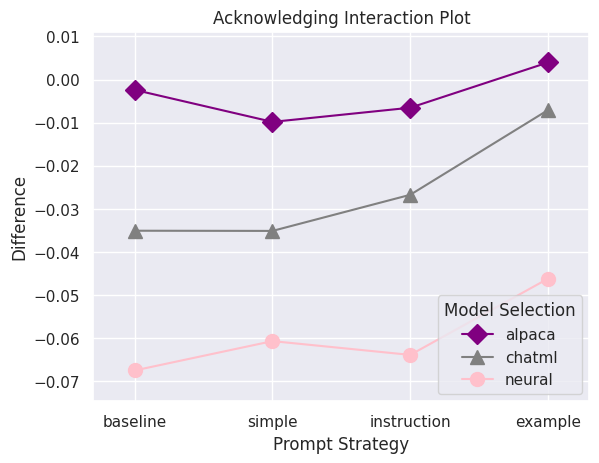

In [ ]:
fig = interaction_plot(x=df_acknowledging_empathy['prompt'], trace=df_acknowledging_empathy['model'],
                       response=df_acknowledging_empathy['difference'],
                       colors=['purple', 'gray', 'pink'], markers=['D', '^', 'o'], ms=10)
plt.xlabel('Prompt Strategy')
plt.ylabel('Difference')
plt.title('Acknowledging Interaction Plot')
plt.legend(title='Model Selection')
plt.show()

In [ ]:
model = ols('difference ~  C(model) * C(prompt) ', data=df_acknowledging_empathy).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                        sum_sq      df          F        PR(>F)
C(model)              3.643080     2.0  58.669298  5.425896e-26
C(prompt)             0.417295     3.0   4.480162  3.796103e-03
C(model):C(prompt)    0.096279     6.0   0.516835  7.960409e-01
Residual            214.228343  6900.0        NaN           NaN


In [ ]:
df_collective_reasoning = pd.DataFrame()

In [ ]:
df_collective_reasoning['difference'] = df_total['LLM collective reasoning'] - df_total['baseline collective reasoning']
df_collective_reasoning['prompt'] = df_total['prompt']
df_collective_reasoning['prompt'] = pd.Categorical(df_collective_reasoning['prompt'], categories=prompt_order, ordered=True)
df_collective_reasoning['bot'] = df_total['bot']
df_collective_reasoning['model'] = df_total['model']
df_collective_reasoning_empathy = df_collective_reasoning[df_collective_reasoning['bot'] == 'Empathy Bot']

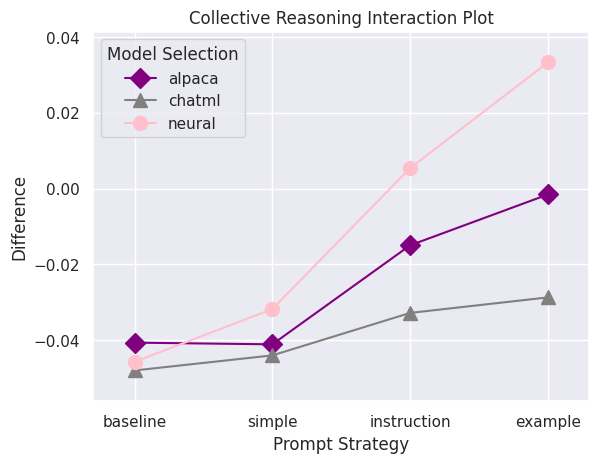

In [ ]:
fig = interaction_plot(x=df_collective_reasoning_empathy['prompt'], trace=df_collective_reasoning_empathy['model'],
                       response=df_collective_reasoning_empathy['difference'],
                       colors=['purple', 'gray', 'pink'], markers=['D', '^', 'o'], ms=10)
plt.xlabel('Prompt Strategy')
plt.ylabel('Difference')
plt.title('Collective Reasoning Interaction Plot')
plt.legend(title='Model Selection')
plt.show()

In [ ]:
model = ols('difference ~  C(model) * C(prompt) ', data=df_collective_reasoning_empathy).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                        sum_sq      df          F        PR(>F)
C(model)              0.948581     2.0  11.303134  1.256421e-05
C(prompt)             2.384728     3.0  18.944008  3.123048e-12
C(model):C(prompt)    0.649884     6.0   2.581300  1.686764e-02
Residual            289.530855  6900.0        NaN           NaN


In [ ]:
df_imperative_statement = pd.DataFrame()

In [ ]:
df_imperative_statement['difference'] = df_total['LLM imperative statement'] - df_total['baseline imperative statement']
df_imperative_statement['prompt'] = df_total['prompt']
df_imperative_statement['prompt'] = pd.Categorical(df_imperative_statement['prompt'], categories=prompt_order, ordered=True)
df_imperative_statement['bot'] = df_total['bot']
df_imperative_statement['model'] = df_total['model']
df_imperative_statement_empathy = df_imperative_statement[df_imperative_statement['bot'] == 'Empathy Bot']

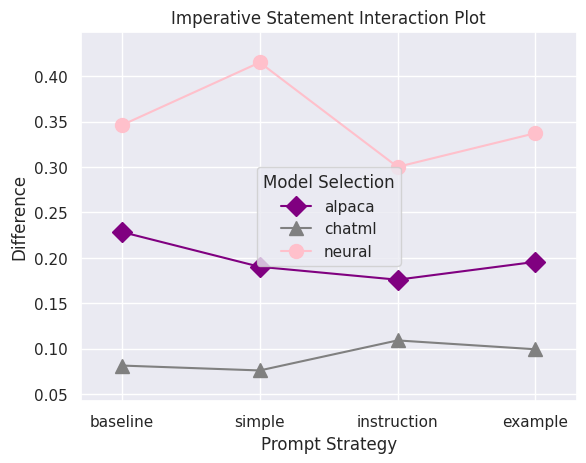

In [ ]:
fig = interaction_plot(x=df_imperative_statement_empathy['prompt'], trace=df_imperative_statement_empathy['model'],
                       response=df_imperative_statement_empathy['difference'],
                       colors=['purple', 'gray', 'pink'], markers=['D', '^', 'o'], ms=10)
plt.xlabel('Prompt Strategy')
plt.ylabel('Difference')
plt.title('Imperative Statement Interaction Plot')
plt.legend(title='Model Selection')
plt.show()

In [ ]:
model = ols('difference ~  C(model) * C(prompt) ', data=df_imperative_statement_empathy).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                         sum_sq      df          F        PR(>F)
C(model)              77.546693     2.0  76.881641  9.491251e-34
C(prompt)              0.963927     3.0   0.637107  5.910417e-01
C(model):C(prompt)     4.272633     6.0   1.411997  2.057007e-01
Residual            3479.843644  6900.0        NaN           NaN


In [ ]:
df_interim_questions = pd.DataFrame()

In [ ]:
df_interim_questions['difference'] = df_total['LLM interim questions'] - df_total['baseline interim questions']
df_interim_questions['prompt'] = df_total['prompt']
df_interim_questions['prompt'] = pd.Categorical(df_interim_questions['prompt'], categories=prompt_order, ordered=True)
df_interim_questions['bot'] = df_total['bot']
df_interim_questions['model'] = df_total['model']
df_interim_questions_empathy = df_interim_questions[df_interim_questions['bot'] == 'Empathy Bot']

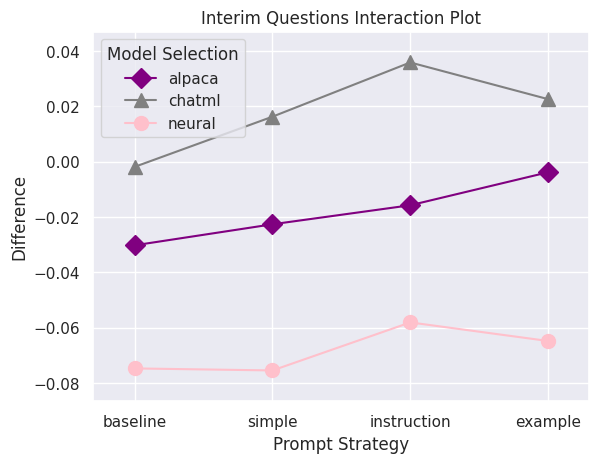

In [ ]:
fig = interaction_plot(x=df_interim_questions_empathy['prompt'], trace=df_interim_questions_empathy['model'],
                       response=df_interim_questions_empathy['difference'],
                       colors=['purple', 'gray', 'pink'], markers=['D', '^', 'o'], ms=10)
plt.xlabel('Prompt Strategy')
plt.ylabel('Difference')
plt.title('Interim Questions Interaction Plot')
plt.legend(title='Model Selection')
plt.show()

In [ ]:
model = ols('difference ~  C(model) * C(prompt) ', data=df_interim_questions_empathy).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                        sum_sq      df           F        PR(>F)
C(model)              8.687637     2.0  106.493784  2.817031e-46
C(prompt)             0.591218     3.0    4.831465  2.319266e-03
C(model):C(prompt)    0.170544     6.0    0.696848  6.521929e-01
Residual            281.446914  6900.0         NaN           NaN


In [ ]:
df_caring_statement = pd.DataFrame()

In [ ]:
df_caring_statement['difference'] = df_total['LLM caring statement'] - df_total['baseline caring statement']
df_caring_statement['prompt'] = df_total['prompt']
df_caring_statement['prompt'] = pd.Categorical(df_caring_statement['prompt'], categories=prompt_order, ordered=True)
df_caring_statement['bot'] = df_total['bot']
df_caring_statement['model'] = df_total['model']
df_caring_statement_empathy = df_caring_statement[df_caring_statement['bot'] == 'Empathy Bot']

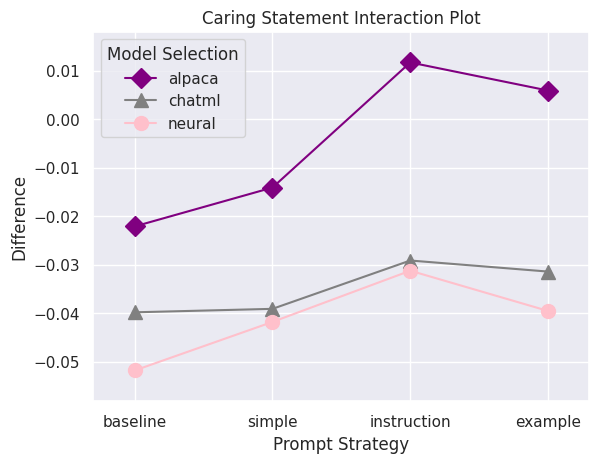

In [ ]:
fig = interaction_plot(x=df_caring_statement_empathy['prompt'], trace=df_caring_statement_empathy['model'],
                       response=df_caring_statement_empathy['difference'],
                       colors=['purple', 'gray', 'pink'], markers=['D', '^', 'o'], ms=10)
plt.xlabel('Prompt Strategy')
plt.ylabel('Difference')
plt.title('Caring Statement Interaction Plot')
plt.legend(title='Model Selection')
plt.show()

In [ ]:
model = ols('difference ~  C(model) * C(prompt) ', data=df_caring_statement_empathy).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                        sum_sq      df          F        PR(>F)
C(model)              1.750416     2.0  41.294023  1.488374e-18
C(prompt)             0.492327     3.0   7.742980  3.683449e-05
C(model):C(prompt)    0.126302     6.0   0.993198  4.278728e-01
Residual            146.242367  6900.0        NaN           NaN


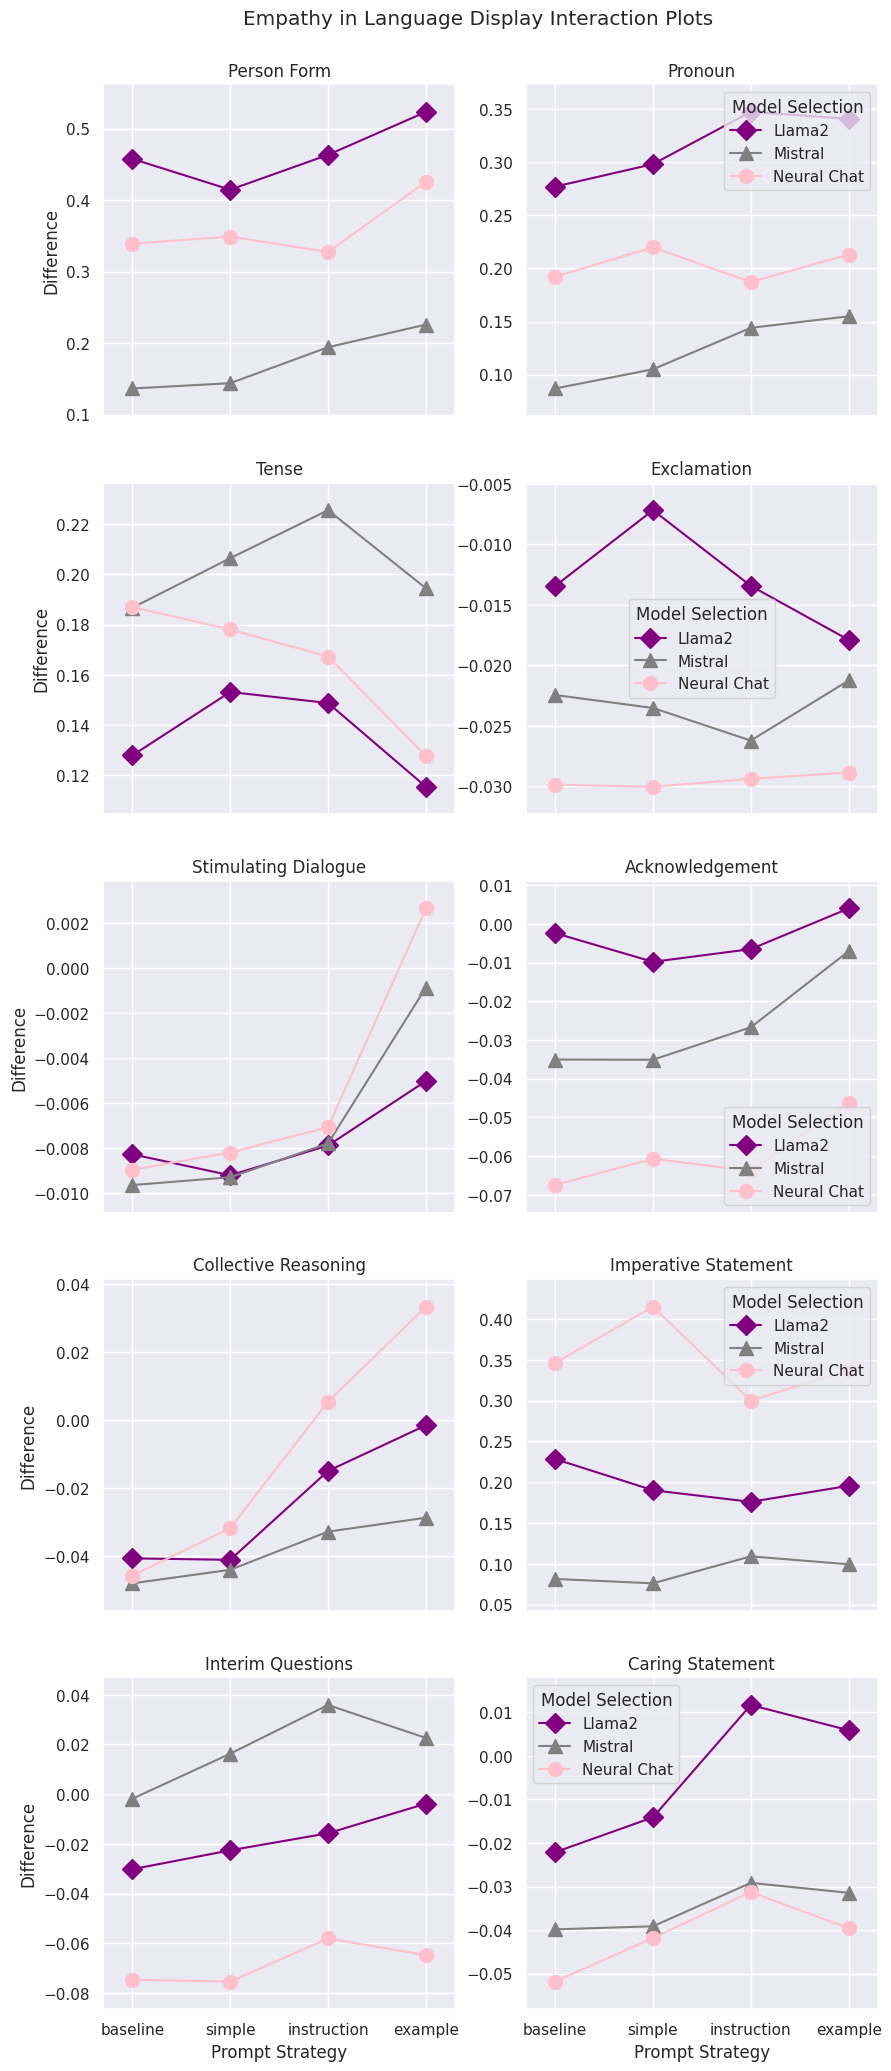

In [ ]:
fig = plt.figure(figsize=(10, 25))
grid = plt.GridSpec(5, 2)
fig.suptitle('Empathy in Language Display Interaction Plots', y=0.91)

ax1 = fig.add_subplot(grid[0, 0])
interaction_plot(x=df_person_form_empathy['prompt'], trace=df_person_form_empathy['model'], response=df_person_form_empathy['difference'],
                       colors=['purple', 'gray', 'pink'], markers=['D', '^', 'o'], ms=10, ax=ax1)
ax1.set_xlabel('')
ax1.set_xticklabels([])
ax1.set_ylabel('Difference')
ax1.set_title('Person Form')
ax1.get_legend().remove()

ax2 = fig.add_subplot(grid[0, 1])
interaction_plot(x=df_pronoun_empathy['prompt'], trace=df_pronoun_empathy['model'], response=df_pronoun_empathy['difference'],
                       colors=['purple', 'gray', 'pink'], markers=['D', '^', 'o'], ms=10, ax=ax2)
ax2.set_xlabel('')
ax2.set_xticklabels([])
ax2.set_ylabel('')
ax2.set_title('Pronoun')
ax2.legend(title='Model Selection', labels = ['Llama2', 'Mistral', 'Neural Chat'])

ax3 = fig.add_subplot(grid[1, 0])
interaction_plot(x=df_tense_empathy['prompt'], trace=df_tense_empathy['model'], response=df_tense_empathy['difference'],
                       colors=['purple', 'gray', 'pink'], markers=['D', '^', 'o'], ms=10, ax=ax3)
ax3.set_xlabel('')
ax3.set_xticklabels([])
ax3.set_ylabel('Difference')
ax3.set_title('Tense')
ax3.get_legend().remove()

ax4 = fig.add_subplot(grid[1, 1])
interaction_plot(x=df_exclamation_empathy['prompt'], trace=df_exclamation_empathy['model'], response=df_exclamation_empathy['difference'],
                       colors=['purple', 'gray', 'pink'], markers=['D', '^', 'o'], ms=10, ax=ax4)
ax4.set_xlabel('')
ax4.set_xticklabels([])
ax4.set_ylabel('')
ax4.set_title('Exclamation')
ax4.legend(title='Model Selection', labels = ['Llama2', 'Mistral', 'Neural Chat'])

ax5 = fig.add_subplot(grid[2, 0])
interaction_plot(x=df_stimulating_dialogue_empathy['prompt'], trace=df_stimulating_dialogue_empathy['model'],
                       response=df_stimulating_dialogue_empathy['difference'],
                       colors=['purple', 'gray', 'pink'], markers=['D', '^', 'o'], ms=10, ax=ax5)
ax5.set_xlabel('')
ax5.set_xticklabels([])
ax5.set_ylabel('Difference')
ax5.set_title('Stimulating Dialogue')
ax5.get_legend().remove()

ax6 = fig.add_subplot(grid[2, 1])
interaction_plot(x=df_acknowledging_empathy['prompt'], trace=df_acknowledging_empathy['model'],
                       response=df_acknowledging_empathy['difference'],
                       colors=['purple', 'gray', 'pink'], markers=['D', '^', 'o'], ms=10, ax=ax6)
ax6.set_xlabel('')
ax6.set_xticklabels([])
ax6.set_ylabel('')
ax6.set_title('Acknowledgement')
ax6.legend(title='Model Selection', labels = ['Llama2', 'Mistral', 'Neural Chat'])

ax7 = fig.add_subplot(grid[3, 0])
interaction_plot(x=df_collective_reasoning_empathy['prompt'], trace=df_collective_reasoning_empathy['model'],
                       response=df_collective_reasoning_empathy['difference'],
                       colors=['purple', 'gray', 'pink'], markers=['D', '^', 'o'], ms=10, ax=ax7)
ax7.set_xlabel('')
ax7.set_xticklabels([])
ax7.set_ylabel('Difference')
ax7.set_title('Collective Reasoning')
ax7.get_legend().remove()

ax8 = fig.add_subplot(grid[3, 1])
interaction_plot(x=df_imperative_statement_empathy['prompt'], trace=df_imperative_statement_empathy['model'],
                       response=df_imperative_statement_empathy['difference'],
                       colors=['purple', 'gray', 'pink'], markers=['D', '^', 'o'], ms=10, ax=ax8)
ax8.set_xlabel('')
ax8.set_xticklabels([])
ax8.set_ylabel('')
ax8.set_title('Imperative Statement')
ax8.legend(title='Model Selection', labels = ['Llama2', 'Mistral', 'Neural Chat'])

ax9 = fig.add_subplot(grid[4, 0])
interaction_plot(x=df_interim_questions_empathy['prompt'], trace=df_interim_questions_empathy['model'],
                       response=df_interim_questions_empathy['difference'],
                       colors=['purple', 'gray', 'pink'], markers=['D', '^', 'o'], ms=10, ax=ax9)
ax9.set_xlabel('Prompt Strategy')
ax9.set_ylabel('Difference')
ax9.set_title('Interim Questions')
ax9.get_legend().remove()

ax10 = fig.add_subplot(grid[4, 1])
interaction_plot(x=df_caring_statement_empathy['prompt'], trace=df_caring_statement_empathy['model'],
                       response=df_caring_statement_empathy['difference'],
                       colors=['purple', 'gray', 'pink'], markers=['D', '^', 'o'], ms=10, ax=ax10)
ax10.set_xlabel('Prompt Strategy')
ax10.set_ylabel('')
ax10.set_title('Caring Statement')
ax10.legend(title='Model Selection', labels = ['Llama2', 'Mistral', 'Neural Chat'])

# plt.savefig(save_directory+'interaction plots.png')
plt.show()